In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

#1

file_path = 'water_potability.csv'

dataset = pd.read_csv(file_path)


print(dataset.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
#2

#menampilkan jumlah baris,kolom,typedata dan nilai unik
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [ ]:
#3

# Check for missing values
print(dataset.isnull().sum())

# mengganti missing values dengan mean
dataset = dataset.fillna(dataset.mean())

#check kembali
print(dataset.isnull().sum())

# menentukan batas outlier
for col in dataset.columns:
  q1 = dataset[col].quantile(0.25)
  q3 = dataset[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # Menghitung nilai rata-rata dari kolom
  mean_value = dataset[col].mean()

  # menggantikan outlier dengan nilai rata-rata
  dataset[col] = dataset[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
print(dataset.head())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  7.080795  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potabi

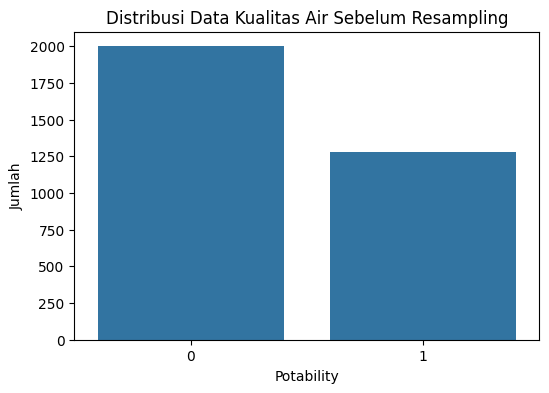

<ipython-input-8-70a2c7c54fed>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = dataset.groupby('Potability', group_keys=False).apply(lambda x: x.sample(2, random_state=1).reset_index(drop=True))


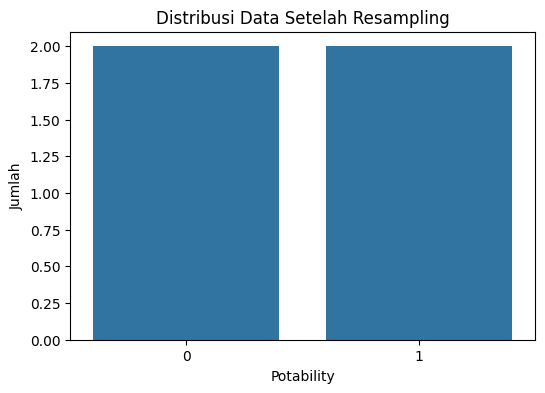

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Potability')
plt.title("Distribusi Data Kualitas Air Sebelum Resampling")
plt.xlabel("Potability")
plt.ylabel("Jumlah")
plt.show()


stratified_sample = dataset.groupby('Potability', group_keys=False).apply(lambda x: x.sample(2, random_state=1).reset_index(drop=True))

plt.figure(figsize=(6, 4))
sns.countplot(data=random_sample, x='Potability')
plt.title("Distribusi Data Setelah Resampling")
plt.xlabel("Potability")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
#4

fitur = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

X = dataset[fitur]
y = dataset[target]

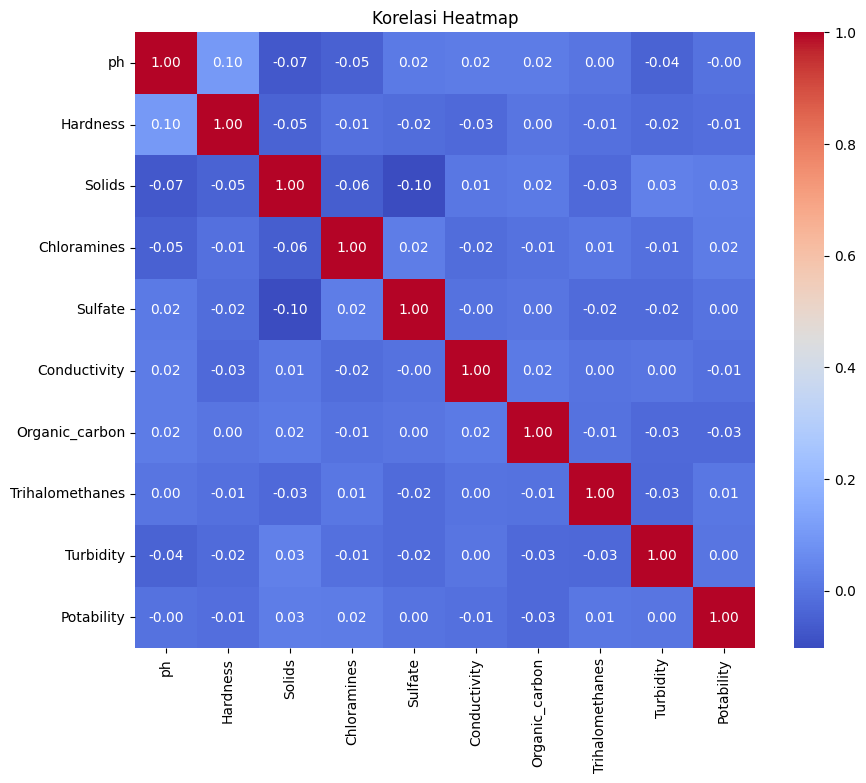

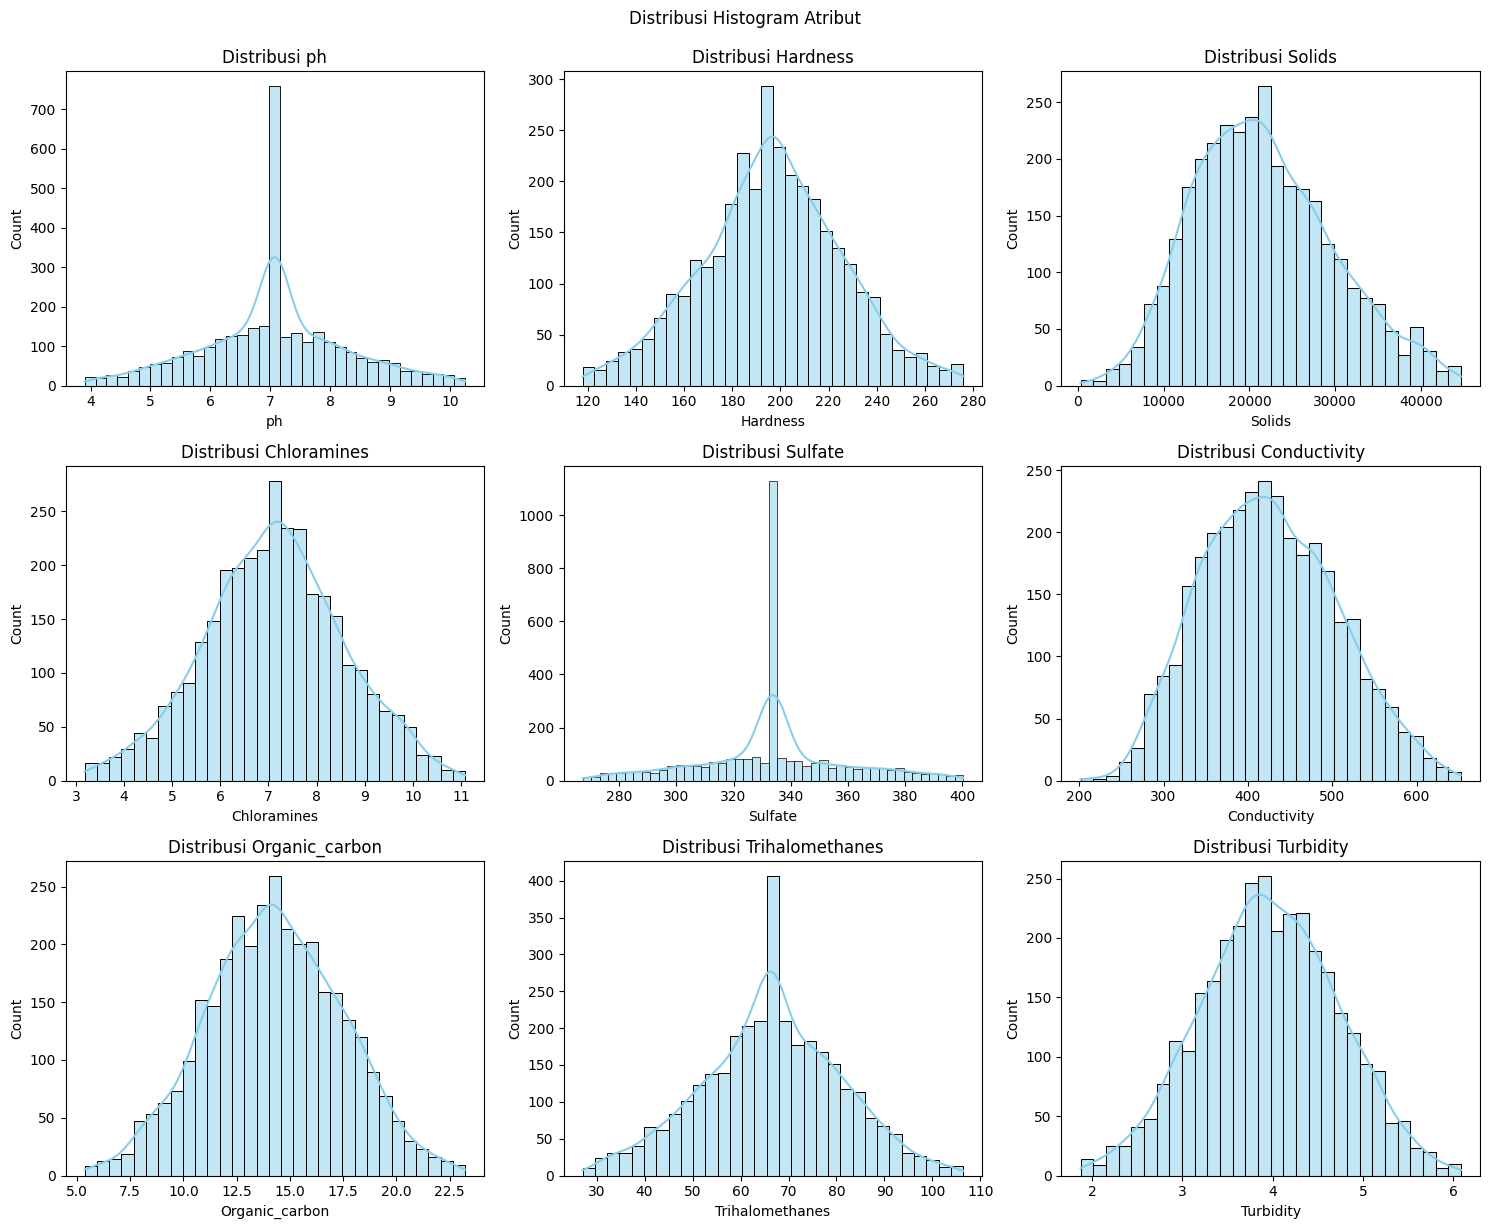

In [ ]:
#5

#Korelasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Heatmap")
plt.show()

#Distribusi Histogram Plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(X):
    plt.subplot(3, 3, i + 1)
    sns.histplot(dataset[col], kde=True, color='skyblue')
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.suptitle("Distribusi Histogram Atribut", y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
  Akurasi Sebelum Normalisasi: 0.6280
  Akurasi Setelah Normalisasi: 0.6280


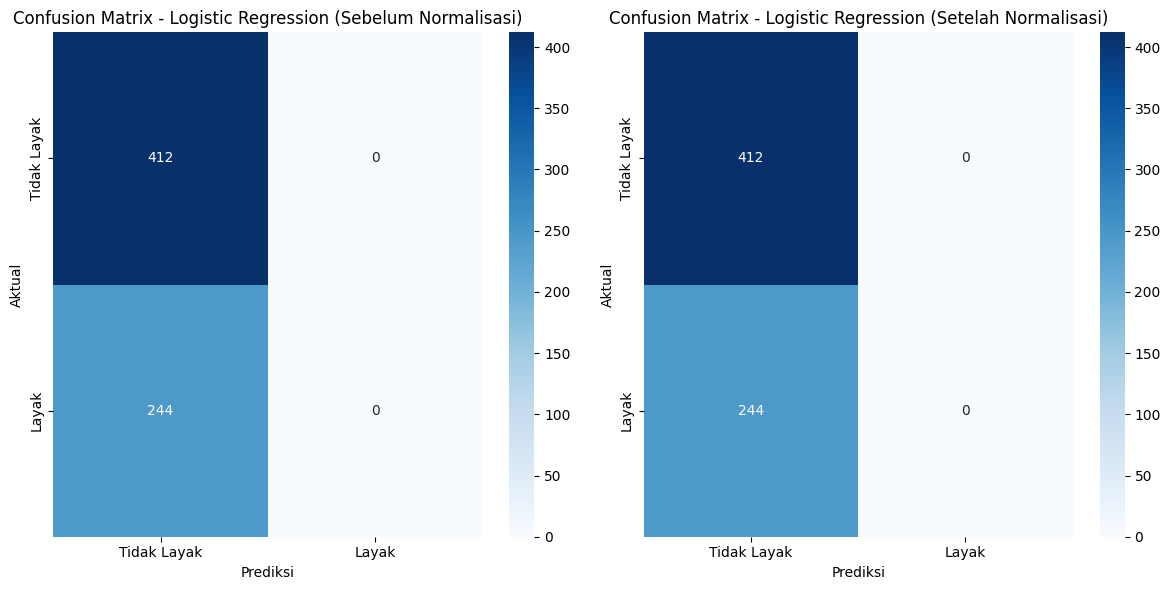


Random Forest
  Akurasi Sebelum Normalisasi: 0.6418
  Akurasi Setelah Normalisasi: 0.6402


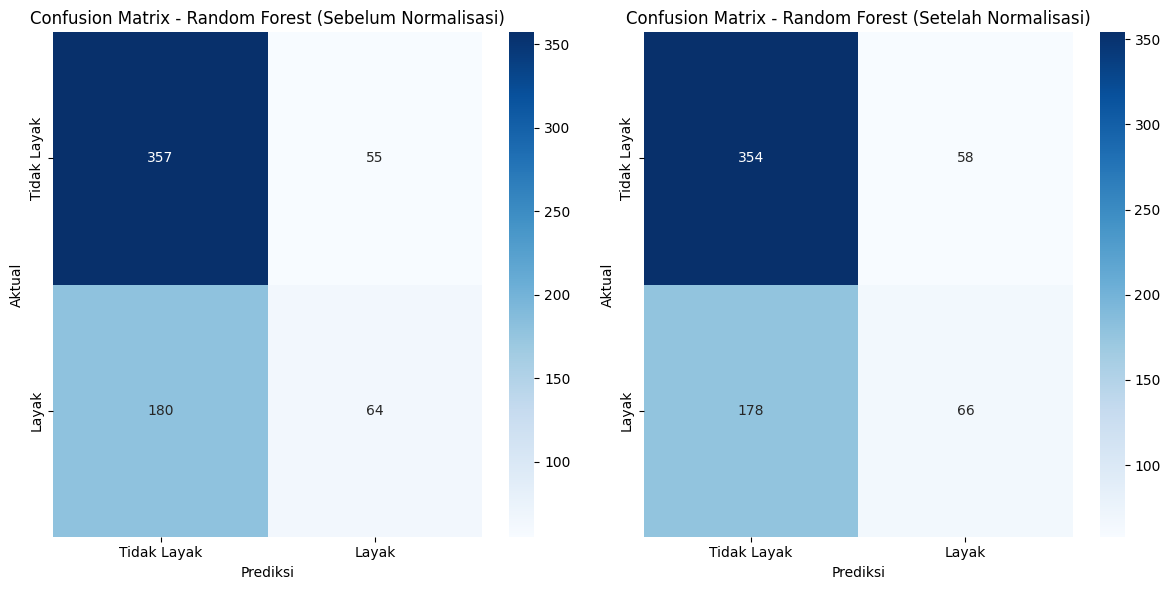


SVM
  Akurasi Sebelum Normalisasi: 0.6280
  Akurasi Setelah Normalisasi: 0.6463


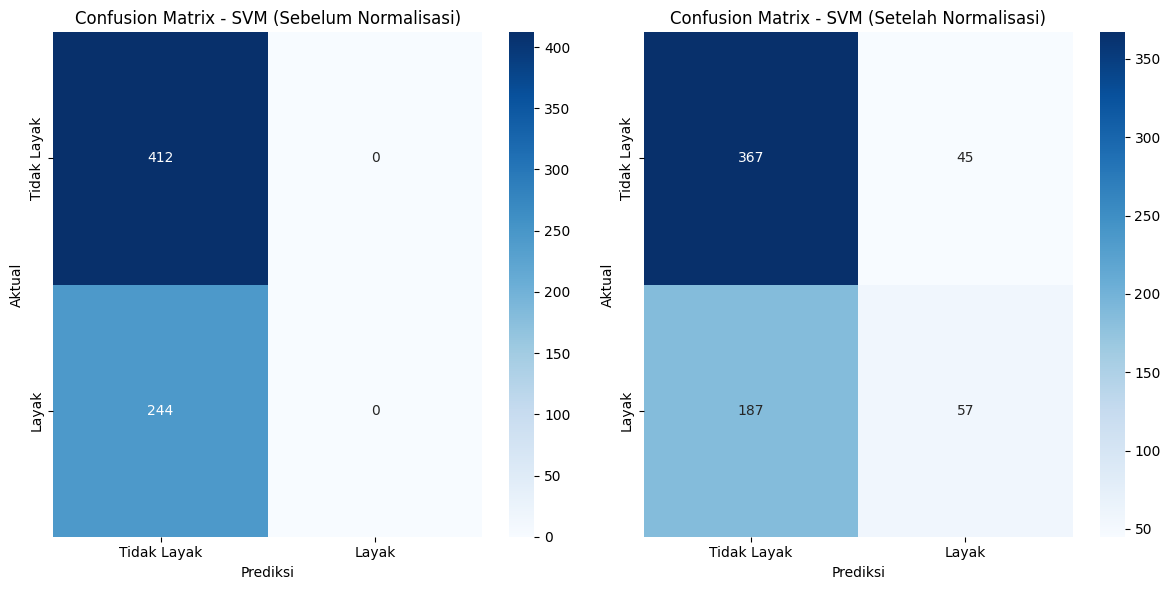


KNN
  Akurasi Sebelum Normalisasi: 0.5305
  Akurasi Setelah Normalisasi: 0.6037


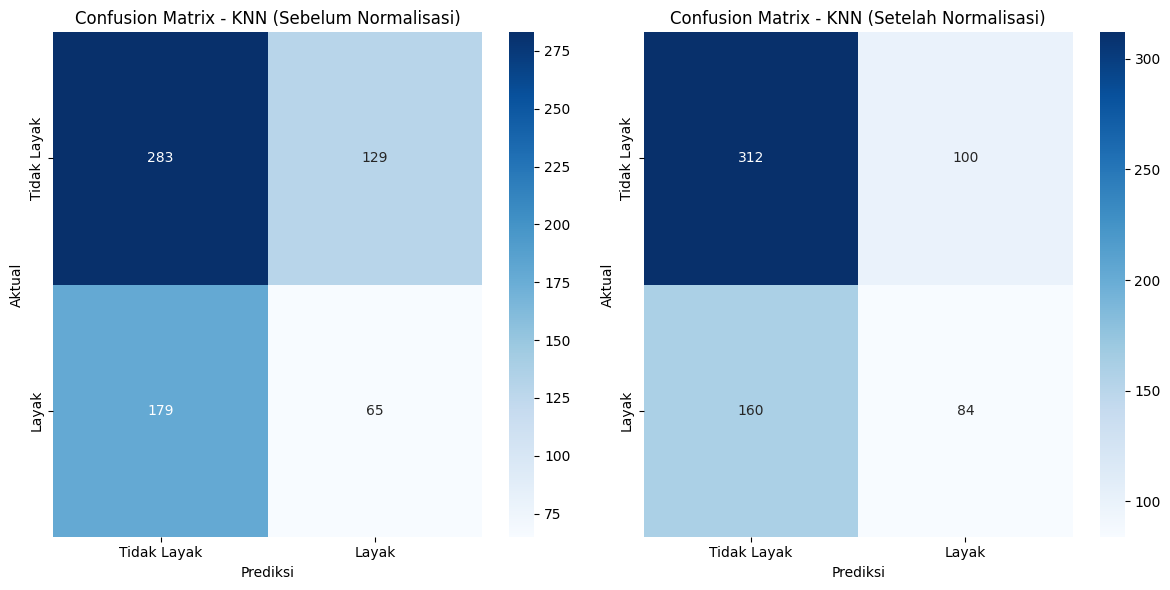


Decision Tree
  Akurasi Sebelum Normalisasi: 0.5640
  Akurasi Setelah Normalisasi: 0.5701


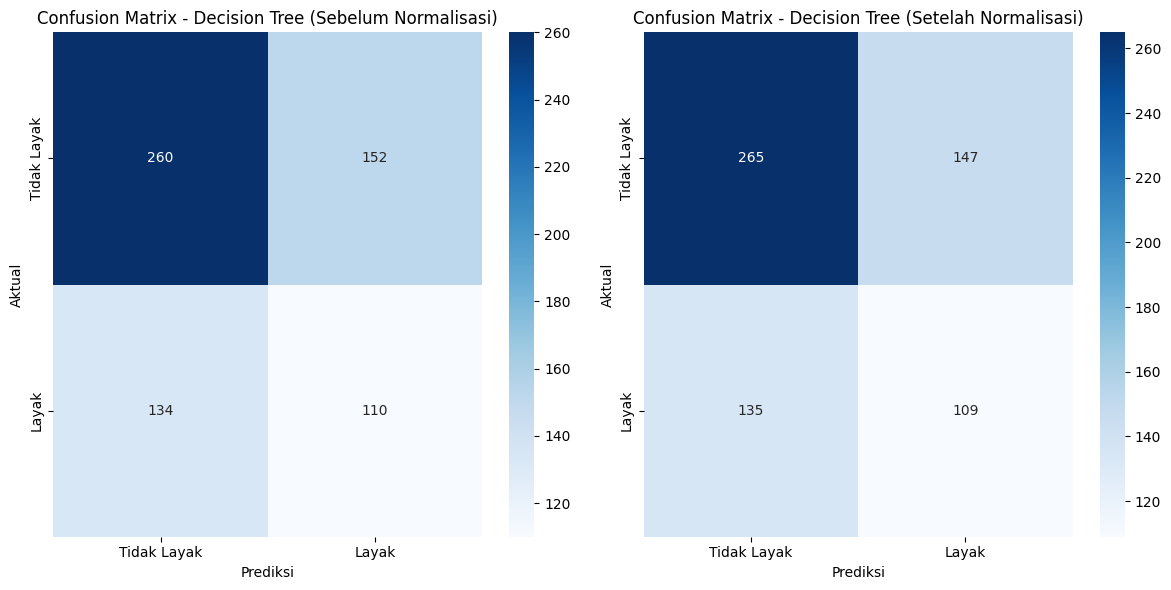

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Normalisasi data ---
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Menyimpan hasil akurasi dan confusion matrix
results = {}

# Melatih dan mengevaluasi setiap model
for model_name, model in models.items():
    # Melatih model dengan data sebelum normalisasi
    model.fit(X_train, y_train)
    y_pred_before = model.predict(X_test)
    accuracy_before = accuracy_score(y_test, y_pred_before)
    cm_before = confusion_matrix(y_test, y_pred_before)

    # Melatih model dengan data setelah normalisasi
    model.fit(X_train_scaled, y_train)
    y_pred_after = model.predict(X_test_scaled)
    accuracy_after = accuracy_score(y_test, y_pred_after)
    cm_after = confusion_matrix(y_test, y_pred_after)

    # Menyimpan hasil evaluasi
    results[model_name] = {
        'accuracy_before': accuracy_before,
        'accuracy_after': accuracy_after,
        'cm_before': cm_before,
        'cm_after': cm_after
    }

# Menampilkan hasil akurasi dan confusion matrix
for model_name, result in results.items():
    print(f"\n{model_name}")
    print(f"  Akurasi Sebelum Normalisasi: {result['accuracy_before']:.4f}")
    print(f"  Akurasi Setelah Normalisasi: {result['accuracy_after']:.4f}")

    # Menampilkan confusion matrix sebelum dan setelah normalisasi
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Confusion Matrix Sebelum Normalisasi
    sns.heatmap(result['cm_before'], annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Layak', 'Layak'], yticklabels=['Tidak Layak', 'Layak'], ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {model_name} (Sebelum Normalisasi)')
    axes[0].set_xlabel('Prediksi')
    axes[0].set_ylabel('Aktual')

    # Confusion Matrix Setelah Normalisasi
    sns.heatmap(result['cm_after'], annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Layak', 'Layak'], yticklabels=['Tidak Layak', 'Layak'], ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - {model_name} (Setelah Normalisasi)')
    axes[1].set_xlabel('Prediksi')
    axes[1].set_ylabel('Aktual')

    plt.tight_layout()
    plt.show()